# Rappi Challenge 🚀  
## Step 1: Data Loading and Exploratory Data Analysis (EDA)  

Welcome to my Rappi Challenge notebook! In this first step, I will:  

- Load the dataset 📂  
- Perform **Exploratory Data Analysis (EDA)** to understand the data 📊  
- Identify and handle missing or inconsistent data 🛠️  
- Analyze the distribution of key features 📈  
- Explore relationships between variables to gain initial insights 🔍  

The goal is to **understand the dataset and define a strategy** to predict whether an order will be taken by a courier. Let's get started!  

## Step 1.1: Understanding the Dataset 🧐  

Before diving into the analysis, it's important to understand the structure of our dataset. Below is a description of each column:  

| **Column Name**      | **Description** |
|----------------------|----------------|
| `order_id`          | Unique identifier for each order. |
| `store_id`          | Unique identifier of the store where the order was placed. |
| `to_user_distance`  | Distance (in km) between the store and the customer's location. |
| `to_user_elevation` | Difference in elevation (in meters) between the store and the customer's location (meters above sea level). |
| `total_earning`     | Amount (in currency) that the courier earns for delivering the order. |
| `created_at`        | Timestamp indicating when the order was created. |
| `taken`             | Binary indicator (1 = order was taken by a courier, 0 = order was not taken). |

Understanding these columns is crucial, as they will help us determine which factors influence whether an order is accepted by a courier.  

Next, we will clean and organize the data to ensure the **best data quality** before proceeding with our analysis. 🚀  


In [426]:
#import libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [427]:
#load the data
orders = pd.read_csv('Orders (2025 Case).csv')

In [428]:
orders.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
0,14364873,30000009,2.478101,-72.719360,4200.0,2017-09-07T20:02:17Z,0
1,14370123,30000058,0.451711,37.754761,4200.0,2017-09-07T20:13:16Z,0
2,14368534,900003684,2.026072,207.191162,4000.0,2017-09-07T20:07:23Z,0
3,14369923,900014085,0.965496,117.429199,3450.0,2017-09-07T20:12:14Z,1
4,14367859,900004363,0.577156,-7.895874,5200.0,2017-09-07T20:13:16Z,1


In [429]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125549 entries, 0 to 125548
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           125549 non-null  int64  
 1   store_id           125549 non-null  int64  
 2   to_user_distance   125549 non-null  float64
 3   to_user_elevation  125549 non-null  float64
 4   total_earning      125549 non-null  float64
 5   created_at         125549 non-null  object 
 6   taken              125549 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 6.7+ MB


## Step 2: Data Quality Check ✅  

After an initial inspection of the dataset, we can confirm that **there are no missing values**.  
This means we can proceed directly to the exploratory analysis without the need for imputation or handling null values.  

Now, let's **clean and organize the data** to ensure the **best data quality**. This includes:  
- Removing duplicates (if any)  
- Formatting data types correctly  
- Standardizing values for better consistency  

Once the data is properly structured, we will move forward with exploratory analysis to uncover meaningful insights.  


In [430]:
#lets format the date column
from datetime import datetime
orders['created_at'] = pd.to_datetime(orders['created_at'], format='%Y-%m-%dT%H:%M:%SZ')

In [431]:
orders.describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
count,1.255490e+05,1.255490e+05,125549.000000,125549.000000,125549.000000,125549,125549.000000
mean,1.507838e+07,7.485716e+08,1.476668,27.369828,5374.313360,2017-09-20 10:30:15.587109376,0.922827
min,1.421073e+07,3.000000e+07,0.000000,-260.333130,0.000000,2017-09-05 00:01:02,0.000000
25%,1.467255e+07,9.000043e+08,0.809372,-18.417603,4200.000000,2017-09-13 07:47:03,1.000000
50%,1.509367e+07,9.000077e+08,1.360573,11.781250,5200.000000,2017-09-20 19:20:55,1.000000
75%,1.547552e+07,9.000127e+08,2.003069,62.978638,6400.000000,2017-09-27 12:28:57,1.000000
max,1.590252e+07,9.000173e+08,9.360177,975.226074,108200.000000,2017-10-04 23:58:53,1.000000
std,4.752629e+05,3.298381e+08,0.846750,84.818191,1784.919817,NaN,0.266867


In [432]:
#check for duplicates
orders.duplicated().sum() 

np.int64(0)

In [433]:
orders['created_at'].dt.to_period('M').nunique()

2

In [434]:
orders['Year-Month'] = orders['created_at'].dt.to_period('M')

In [435]:
orders.groupby(['Year-Month', 'taken']).agg({'order_id':'count', 'to_user_distance':'mean', 'to_user_elevation':'mean', 'total_earning':'mean'}).reset_index()

,Year-Month,taken,order_id,to_user_distance,to_user_elevation,total_earning
0,2017-09,0,8625,1.725999,23.764095,5024.615188
1,2017-09,1,101190,1.451024,27.648335,5380.689861
2,2017-10,0,1064,1.771326,22.927621,5572.885338
3,2017-10,1,14670,1.485593,27.890877,5521.527267


## Step 2.1: Data Formatting and Initial Insights 🛠️  

To ensure consistency and facilitate analysis, we **formatted the `created_at` column as a date**.  
Additionally, we conducted an initial data inspection and found that:  

- ✅ There are **no duplicate records** in the dataset.  
- 📆 We **separated the data by month** (September and October) to analyze trends over time.  
- 📊 We **calculated the mean of each column**, grouped by month and the `taken` status, to uncover early insights.  

### Next Steps 🚀  
Now, we will create **visualizations** to better understand the data distribution. This includes:  
- Identifying **potential outliers** and understanding their impact.  
- Exploring the relationships between key variables.  

By doing this, we can refine our dataset and manage any anomalies before proceeding with predictive modeling. 🔍  


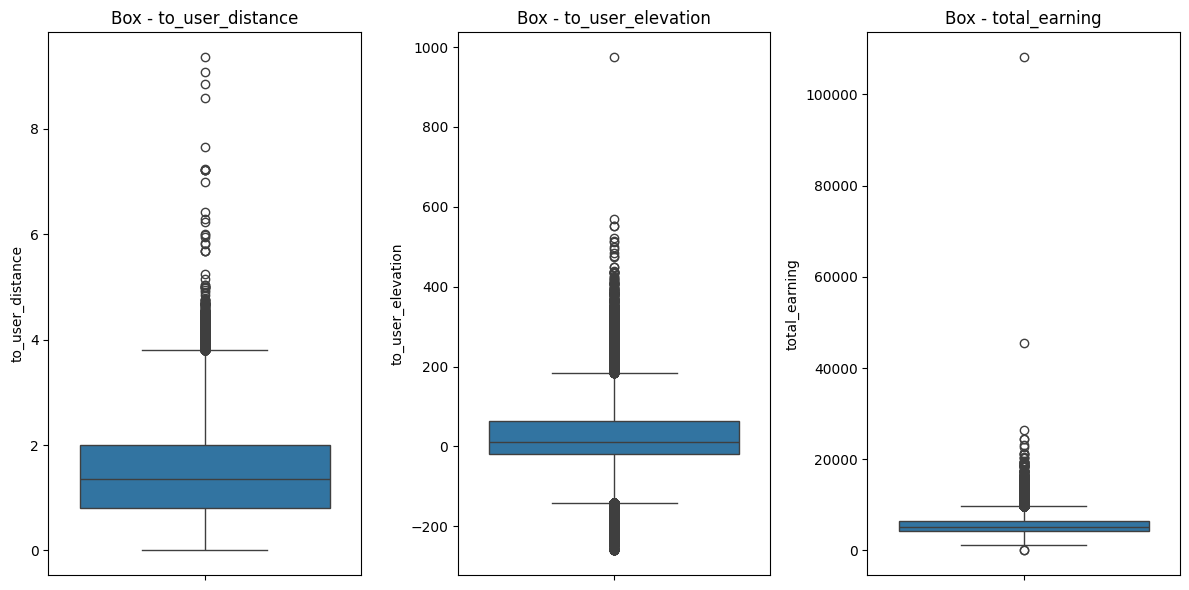

In [436]:
#lets check the distribution of our data
numeric_columns = ['to_user_distance', 'to_user_elevation', 'total_earning']

# Crear un diagrama de cajas y bigotes para cada columna
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)  # Crear subplots
    sns.boxplot(data=orders, y=column)
    plt.title(f'Box - {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

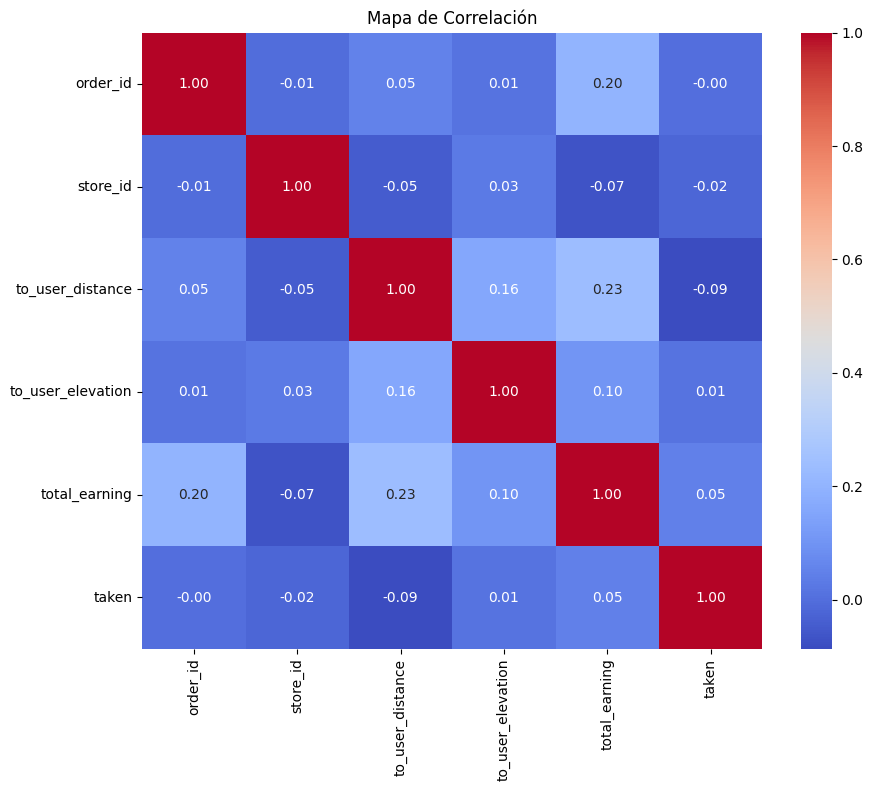

In [437]:
#now a correlation matrix
numeric_orders = orders.select_dtypes(include=['number'])
correlation_matrix = numeric_orders.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlación')
plt.show()

In [438]:
orders[orders['total_earning']>40000]

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month
7579,14421632,900013010,1.157337,-99.425781,45500.0,2017-09-08 17:32:07,1,2017-09
71730,14731230,900007197,1.794446,-207.245483,108200.0,2017-09-14 13:38:08,1,2017-09


In [439]:
orders[orders['to_user_elevation'] > 500]

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month
5746,15701222,30000308,5.946226,975.226074,19500.0,2017-10-01 12:30:06,1,2017-10
32821,14949153,30000097,2.530015,552.779663,12200.0,2017-09-17 19:19:57,1,2017-09
33480,15527513,30000176,3.098737,512.598022,6900.0,2017-09-28 14:24:02,1,2017-09
34337,15701317,900002160,2.533773,552.779663,12600.0,2017-10-01 12:22:04,1,2017-10
34617,15464458,900006491,3.228127,521.867920,8050.0,2017-09-26 21:49:53,1,2017-09
54274,15884756,900014778,4.302365,514.591187,9550.0,2017-10-04 18:28:03,1,2017-10
84759,15727469,30000327,2.666894,569.255005,10050.0,2017-10-01 15:58:04,1,2017-10


In [440]:
orders[orders['to_user_elevation'] < -260]

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month
61785,15494614,900007197,3.186888,-260.068115,5100.0,2017-09-27 18:40:08,1,2017-09
67730,15734062,900007197,3.186888,-260.068115,6400.0,2017-10-01 17:24:04,1,2017-10
84419,14777622,900016684,3.264740,-260.333130,6200.0,2017-09-15 12:50:10,1,2017-09
100055,15093141,900007197,3.345512,-260.141113,5250.0,2017-09-20 19:04:54,1,2017-09
123321,14786303,900007197,3.417081,-260.001221,5400.0,2017-09-15 14:41:08,1,2017-09


# **Data Analysis and Outlier Detection in Elevation and Distance**
In this section, we explore the relationships between distance traveled, terrain elevation, and earnings per kilometer. Our goal is to assess the logical consistency of the data and detect potential outliers.

## **1. Understanding Elevation and Distance Relationships**
To validate the correctness of our data, we introduce a new column that calculates the **slope (elevation change per kilometer)**. This metric helps us determine whether the elevation differences recorded for certain distances are realistic.

## **2. Outlier Detection in Elevation Data**
By plotting the slope distribution, we observe that most values fall within a reasonable range, but some extreme cases exceed **±200 meters per kilometer**. These extreme values could be due to:
- **Data entry errors**
- **Unrealistic elevation changes in short distances**
- **GPS inaccuracies or incorrect mappings**

### **2.1 Applying Logical Filters**
To ensure data consistency, we filter out values where:
- The slope is less than **-200 m/km** (extreme descents)
- The slope is greater than **200 m/km** (extreme ascents)

In [441]:
orders['slope'] = orders['to_user_elevation'] / orders['to_user_distance']

min_slope = -200  
max_slope = 200  

orders_clean = orders[(orders['slope'] >= min_slope) & (orders['slope'] <= max_slope)]


In [442]:
orders.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope
0,14364873,30000009,2.478101,-72.719360,4200.0,2017-09-07 20:02:17,0,2017-09,-29.344797
1,14370123,30000058,0.451711,37.754761,4200.0,2017-09-07 20:13:16,0,2017-09,83.581746
2,14368534,900003684,2.026072,207.191162,4000.0,2017-09-07 20:07:23,0,2017-09,102.262494
3,14369923,900014085,0.965496,117.429199,3450.0,2017-09-07 20:12:14,1,2017-09,121.625770
4,14367859,900004363,0.577156,-7.895874,5200.0,2017-09-07 20:13:16,1,2017-09,-13.680669


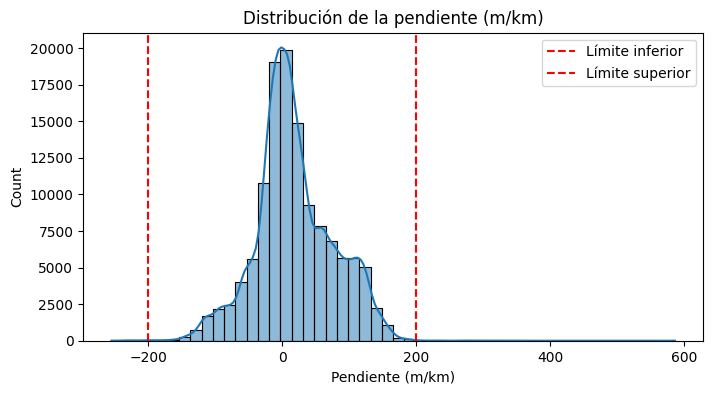

In [443]:
plt.figure(figsize=(8,4))
sns.histplot(orders['slope'], bins=50, kde=True)
plt.axvline(min_slope, color='red', linestyle='dashed', label='Límite inferior')
plt.axvline(max_slope, color='red', linestyle='dashed', label='Límite superior')
plt.title("Distribución de la pendiente (m/km)")
plt.xlabel("Pendiente (m/km)")
plt.legend()
plt.show()

In [444]:
# amount of orders that have the slope out of the range
len(orders[(orders['slope'] < -200) | (orders['slope'] > 200)])

99

In [445]:
# percentage of orders that have the slope out of the range
round(len(orders[(orders['slope'] < -200) | (orders['slope'] > 200)]) / len(orders) * 100, 2)

0.08

In [446]:
orders[(orders['slope'] < -200) | (orders['slope'] > 200)].head(10)

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope
722,14740069,30000286,0.247325,-56.152710,3200.0,2017-09-14 17:18:06,0,2017-09,-227.040031
3006,15701566,30000117,0.219706,78.048462,10150.0,2017-10-01 12:19:02,1,2017-10,355.240249
4826,14750248,30000254,0.104004,-21.967651,5500.0,2017-09-14 19:37:10,1,2017-09,-211.219243
4896,15200498,30000254,0.219201,-50.210815,8200.0,2017-09-22 19:30:07,1,2017-09,-229.063159
6279,15725131,30000286,0.247325,-56.152710,4500.0,2017-10-01 15:40:04,1,2017-10,-227.040031
6503,14431840,900012734,2.156518,494.066772,6900.0,2017-09-08 19:22:11,1,2017-09,229.103941
11554,15203660,30000286,0.388790,111.815918,10050.0,2017-09-22 20:22:12,1,2017-09,287.599990
11844,15888375,30000286,0.408185,110.714355,4700.0,2017-10-04 19:41:07,1,2017-10,271.235641
14536,14846570,30000286,0.408185,110.714355,4000.0,2017-09-16 14:13:50,1,2017-09,271.235641
15857,15570530,30000286,0.332063,-73.364624,3200.0,2017-09-29 12:31:07,1,2017-09,-220.935691


In [447]:
orders.drop(orders[(orders['slope'] < -200) | (orders['slope'] > 200)].index, inplace=True)

In [448]:
orders.drop(orders[orders['to_user_elevation']>800].index, inplace=True)

In [449]:
orders.drop(orders[orders.isnull().any(axis=1)].index, inplace=True)

## 3. Real-World Validation  
To ensure our filtering criteria make sense, we compare with real-world cases in Colombia:  

### 3.1 Bogotá (North)  
In Bogotá, there are areas with steep roads, such as La Calera or the hills near Usaquén. **Short sections** may reach slopes above **150 m/km**, but values beyond **200 m/km** in urban settings are highly unlikely.  

### 3.2 Medellín  
Medellín has steep inclines in neighborhoods like Manrique or Comuna 13. While it is possible to find **brief sections** with slopes near **200 m/km**, it is extremely rare to sustain a **164 m/km** slope for nearly **6 km**.  

### 3.3 Example: Extreme Cases  
We found an entry where:  

- **Elevation change:** -56 meters  
- **Distance traveled:** 0.2 km  
- **Slope:** -280 m/km  

While there are steep roads in Colombia, this **exceeds realistic urban conditions**, suggesting a potential data issue.  

---  

## 4. Conclusion  
We remove these extreme values because:  

- They **do not align** with known urban inclines.  
- Continuous high slopes over long distances (e.g., **164 m/km for 6 km**) are **highly improbable**.  
- Keeping them could **distort** models and analyses.  

By filtering **only 0.08% of the data**, we maintain a **realistic** and **reliable dataset**.  


In [450]:
orders.drop(orders[orders['total_earning']<1000].index, inplace=True)

In [451]:
orders[orders['to_user_distance'] <= 1].describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,slope
count,4.231200e+04,4.231200e+04,42312.000000,42312.000000,42312.000000,42312,42312.000000,42312.000000
mean,1.506519e+07,7.608382e+08,0.615292,9.558892,5098.409907,2017-09-20 04:56:14.254419456,0.950912,15.139801
min,1.421081e+07,3.000000e+07,0.002456,-149.404053,2200.000000,2017-09-05 00:11:02,0.000000,-199.204943
25%,1.465133e+07,9.000043e+08,0.434961,-12.682556,4200.000000,2017-09-12 16:31:05,1.000000,-24.781659
50%,1.507193e+07,9.000077e+08,0.633286,4.774414,5000.000000,2017-09-20 12:50:52,1.000000,9.607702
75%,1.547124e+07,9.000126e+08,0.816448,31.692871,6000.000000,2017-09-27 11:22:53,1.000000,59.637616
max,1.590240e+07,9.000172e+08,0.999909,176.751343,24500.000000,2017-10-04 23:39:54,1.000000,198.802620
std,4.774383e+05,3.188890e+08,0.240567,41.762478,1578.242172,NaN,0.216054,63.208302


In [452]:
orders[(orders['total_earning'] > 6000) & (orders['to_user_distance'] <= 1)]

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope
54,14668850,30000026,0.295965,-12.344971,6200.0,2017-09-12 21:52:03,1,2017-09,-41.710944
65,14670517,900013069,0.608274,5.911011,6200.0,2017-09-12 23:37:02,1,2017-09,9.717677
68,14671218,900015309,0.219865,-17.833252,6200.0,2017-09-13 02:40:02,1,2017-09,-81.110001
119,14822329,900011642,0.976983,-15.536499,6500.0,2017-09-15 23:08:45,1,2017-09,-15.902535
138,14824534,900012742,0.128705,-1.419312,7000.0,2017-09-16 01:15:44,0,2017-09,-11.027643
...,...,...,...,...,...,...,...,...,...
125368,14798733,900004354,0.679170,-98.486084,6500.0,2017-09-15 18:05:09,1,2017-09,-145.009482
125371,14797840,900004621,0.910951,30.808960,6500.0,2017-09-15 18:10:11,1,2017-09,33.820657
125377,14799739,900007718,0.122020,15.772217,7500.0,2017-09-15 18:17:09,1,2017-09,129.259052
125422,15272697,900012734,0.716704,-63.999512,6200.0,2017-09-23 19:46:11,1,2017-09,-89.296931


In [453]:
short_distance_orders = orders[orders['to_user_distance'] <= 1]

q75 = short_distance_orders['total_earning'].quantile(0.75)
q95 = short_distance_orders['total_earning'].quantile(0.95)
q99 = short_distance_orders['total_earning'].quantile(0.99)
max_value = short_distance_orders['total_earning'].max()

In [454]:
print(f"75% of orders have earnings up to: {q75}")
print(f"95% of orders have earnings up to: {q95}")
print(f"99% of orders have earnings up to: {q99}")
print(f"Maximum value found: {max_value}")

75% of orders have earnings up to: 6000.0
95% of orders have earnings up to: 8200.0
99% of orders have earnings up to: 9500.0
Maximum value found: 24500.0


In [455]:
orders[(orders['total_earning'] > 10000) & (orders['to_user_distance'] <= 1)].sort_values('total_earning', ascending=False)

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope
64444,14573879,900013033,0.823672,77.590698,24500.0,2017-09-10 21:12:08,1,2017-09,94.200970
45660,14926396,900006874,0.629038,-8.132324,24500.0,2017-09-17 15:11:50,1,2017-09,-12.928183
83404,15449048,900012872,0.683580,5.787842,22700.0,2017-09-26 18:36:01,1,2017-09,8.466959
8389,15783871,900009068,0.748671,-44.294678,21200.0,2017-10-02 16:40:59,1,2017-10,-59.164371
70104,15836645,30000308,0.489482,61.348755,19200.0,2017-10-03 19:21:07,1,2017-10,125.334045
...,...,...,...,...,...,...,...,...,...
1506,14950924,900003684,0.419390,58.623169,10200.0,2017-09-17 19:37:56,1,2017-09,139.782133
118521,15204443,900014061,0.560586,50.673218,10200.0,2017-09-22 20:04:03,1,2017-09,90.393360
117563,14955276,900011330,0.825768,90.584717,10200.0,2017-09-17 20:12:54,1,2017-09,109.697577
1187,15799713,900009494,0.785645,107.855957,10200.0,2017-10-02 20:40:06,1,2017-10,137.283289


In [456]:
round(len(orders[(orders['total_earning'] > 10000) & (orders['to_user_distance'] <= 1)])/len(orders), 3)

0.003

In [457]:
orders.drop(orders[(orders['total_earning'] > 10000) & (orders['to_user_distance'] <= 1)].index, inplace=True)

In [459]:
# Crear la columna de ganancias por km
orders['earnings_per_km'] = round(orders['total_earning'] / orders['to_user_distance'], 0)
#hacer la columna earnings_per_km a int
orders['earnings_per_km'] = orders['earnings_per_km'].astype(int)

# Definir umbrales basados en distancias
short_distance_threshold = 1  # Distancias menores a 500m
max_earning_per_km = 10000  # Un límite razonable para largas distancias

# Identificar posibles outliers solo en distancias largas
outliers = orders[
    (orders['to_user_distance'] > short_distance_threshold) & 
    (orders['earnings_per_km'] > max_earning_per_km)
]

# Mostrar resultados
print(f"Total de datos: {len(orders)}")
print(f"Datos con earnings_per_km fuera de los límites (solo en distancias largas): {len(outliers)}")
print(f"Porcentaje de datos eliminados: {100 * len(outliers) / len(orders):.2f}%")



Total de datos: 125093
Datos con earnings_per_km fuera de los límites (solo en distancias largas): 89
Porcentaje de datos eliminados: 0.07%


In [460]:
max(orders['earnings_per_km'])

1302794

In [461]:
orders[orders['earnings_per_km'] == 1302794]

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope,earnings_per_km
50493,14639915,900016023,0.002456,0.0,3200.0,2017-09-12 12:34:08,0,2017-09,0.0,1302794


In [474]:
len(orders[(orders['earnings_per_km'] <= orders['total_earning']) | (orders['total_earning'] <= 10000) & (orders['to_user_distance'] <= 1)]) / len(orders)

1.0

In [ ]:
len(orders[(orders['earnings_per_km'] <= orders['total_earning']) | (orders['total_earning'] <= 10000) & (orders['to_user_distance'] <= 1)]) / len(orders)

In [478]:
orders.drop(orders[orders['total_earning']> 40000].index, inplace=True)

In [479]:
pd.options.display.float_format = '{:,.0f}'.format
orders[orders['earnings_per_km'] <= orders['total_earning']].describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,slope,earnings_per_km
count,"83,133","83,133","83,133","83,133","83,133",83133,"83,133","83,133","83,133"
mean,"15,085,038","742,881,840",2,36,"5,513",2017-09-20 13:18:38.630495488,1,19,"3,158"
min,"14,210,727","30,000,003",1,-260,"1,200",2017-09-05 00:01:02,0,-141,795
25%,"14,682,008","900,004,326",1,-23,"4,200",2017-09-13 12:44:10,1,-13,"2,176"
50%,"15,104,873","900,007,722",2,20,"5,200",2017-09-20 21:52:48,1,11,"2,875"
75%,"15,477,193","900,012,786",2,95,"6,500",2017-09-27 12:47:56,1,52,"3,842"
max,"15,902,524","900,017,291",9,522,"26,500",2017-10-04 23:58:53,1,199,"23,302"
std,"474,025","334,644,103",1,98,"1,825",NaN,0,55,"1,354"


In [482]:
normal_orders = orders[orders['earnings_per_km'] <= orders['total_earning']]

qn75 = normal_orders['earnings_per_km'].quantile(0.75)
qn95 = normal_orders['earnings_per_km'].quantile(0.95)
qn99 = normal_orders['earnings_per_km'].quantile(0.99)
max_value_n = normal_orders['earnings_per_km'].max()

print(f"75% of orders have earnings up to: {qn75}")
print(f"95% of orders have earnings up to: {qn95}")
print(f"99% of orders have earnings up to: {qn99}")
print(f"Maximum value found: {max_value_n}")

75% of orders have earnings up to: 3842.0
95% of orders have earnings up to: 5745.399999999994
99% of orders have earnings up to: 7499.0
Maximum value found: 23302


In [483]:
orders[(orders['earnings_per_km'] > 8000) & (orders['earnings_per_km'] <= orders['total_earning'])].sort_values('total_earning', ascending=False)

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope,earnings_per_km
35634,15308498,900007725,1,41,"26,500",2017-09-24 13:47:59,1,2017-09,36,23302
27229,15492210,900006491,2,113,"23,200",2017-09-27 18:00:58,1,2017-09,72,14896
21139,14396929,30000072,2,-55,"21,200",2017-09-08 13:00:11,1,2017-09,-22,8593
47132,15292089,30000253,1,1,"20,500",2017-09-24 07:59:48,1,2017-09,1,17181
101473,15837794,900014452,2,-35,"20,200",2017-10-03 19:01:08,1,2017-10,-20,11501
...,...,...,...,...,...,...,...,...,...,...
38963,14951541,900009494,1,128,"8,200",2017-09-17 19:48:54,1,2017-09,126,8085
64281,15470950,900009494,1,-102,"8,200",2017-09-27 11:14:53,1,2017-09,-100,8087
57890,15476298,900006038,1,51,"8,200",2017-09-27 12:27:56,1,2017-09,51,8180
1082,15484578,30000043,1,-2,"8,200",2017-09-27 14:56:55,1,2017-09,-2,8073


In [485]:
round(len(orders[(orders['earnings_per_km'] > 8000) & (orders['earnings_per_km'] <= orders['total_earning'])].sort_values('total_earning', ascending=False))/len(orders),3)

0.004

In [486]:
orders.drop(orders[(orders['earnings_per_km'] > 8000) & (orders['earnings_per_km'] <= orders['total_earning'])].index, inplace=True)

In [487]:
orders.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,Year-Month,slope,earnings_per_km
0,14364873,30000009,2,-73,"4,200",2017-09-07 20:02:17,0,2017-09,-29,1695
1,14370123,30000058,0,38,"4,200",2017-09-07 20:13:16,0,2017-09,84,9298
2,14368534,900003684,2,207,"4,000",2017-09-07 20:07:23,0,2017-09,102,1974
3,14369923,900014085,1,117,"3,450",2017-09-07 20:12:14,1,2017-09,122,3573
4,14367859,900004363,1,-8,"5,200",2017-09-07 20:13:16,1,2017-09,-14,9010


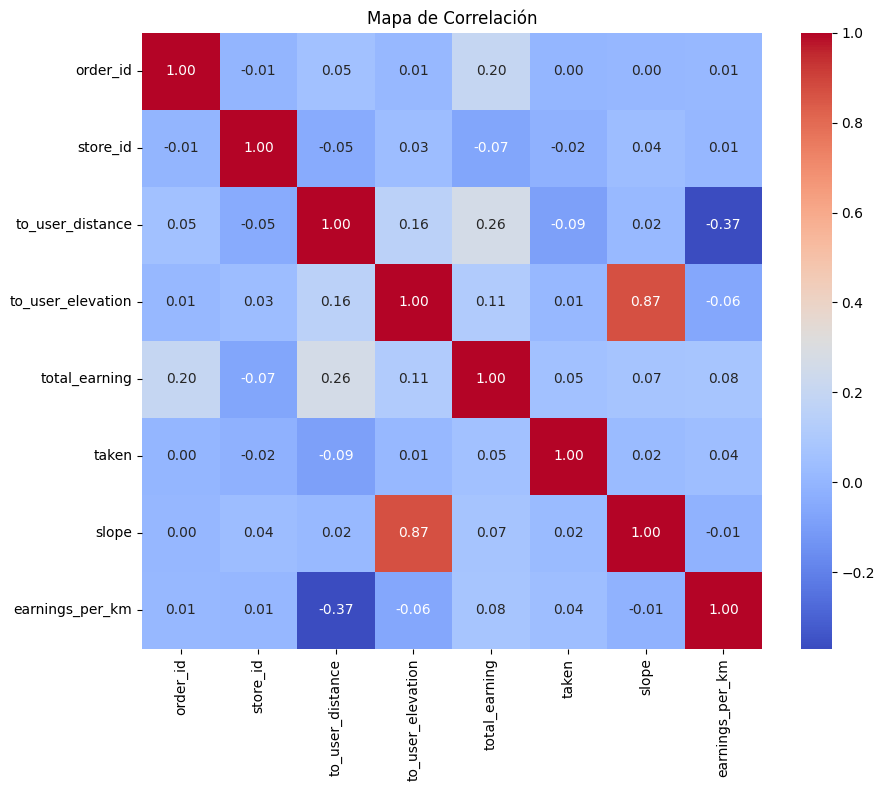

In [493]:
#now a correlation matrix
numeric_orders = orders.select_dtypes(include=['number'])
correlation_matrix = numeric_orders.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlación')
plt.show()

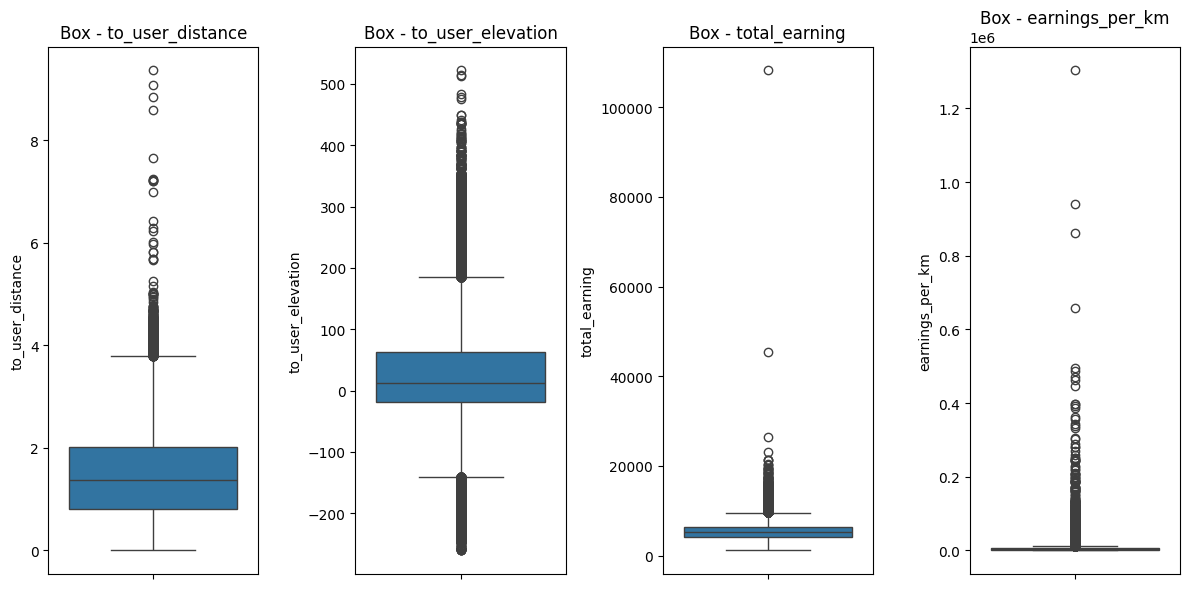

In [477]:
#lets check the distribution of our data
numeric_columns = ['to_user_distance', 'to_user_elevation', 'total_earning', 'earnings_per_km']

# Crear un diagrama de cajas y bigotes para cada columna
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)  # Crear subplots
    sns.boxplot(data=orders, y=column)
    plt.title(f'Box - {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()